In [1]:
import pandas as pd
import numpy as np

In [123]:
df=pd.read_csv('D:/Python/Github_ML/Machine-Learning/data/_preprocessed.csv', index_col=0)
df.head()

,user-id,user-age,user-gender,user-nationality,user-knowledge,user-loyalty,user-loan,user-income,user-savings,user-properties,...,user-dependents,user-pension,product-type,product-risk,product-term,product-yield,transaction-id,year,month,score
0,500,41,0,0,0,1,0,10822,132392,0,...,0,483040,1,1,30,1,5000,2019,9,0.061877
1,500,41,0,0,0,1,0,10822,132392,0,...,0,483040,2,2,10,2,5001,2019,10,0.179746
2,500,41,0,0,0,1,0,10822,132392,0,...,0,483040,0,2,10,2,5002,2019,9,0.767918
3,500,41,0,0,0,1,0,10822,132392,0,...,0,483040,0,0,20,0,5003,2017,12,0.606241
4,501,25,1,0,0,0,0,5284,51806,0,...,5,113300,0,0,1,0,5004,2019,10,0.829035


In [124]:
idx=df.index[df['product-type']==0]
idx=idx[:3400]
df=df.drop(labels=idx, axis=0)

In [158]:
df=df.reindex(columns=[
 'user-age',
 'user-income',
 'user-savings',
 'user-properties',                   
 'user-dependents',  
 'user-pension',                   
 'product-term',   
 'year',
 'month',
 'score',
    
 'user-gender',
 'user-nationality',
 'user-knowledge',
 'user-loyalty',
 'user-loan',
 'user-riskAversion',
 'user-marital',
 'product-yield',  
 'product-risk',
    
 'product-type'
 
])

# Task 1

Применить четыре предложенных метода понижения размерности к своим данным для классификации. Оценить качество работы моделей классификации (минимум 2) на этих данных до и после отбора признаков.

## Одномерный отбор признаков¶

In [68]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [126]:
X = df.iloc[:, :-1].values
y = df["product-type"]

In [127]:
Y = df.iloc[:, -1].values

In [70]:
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

In [71]:
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)

[1.492e+02 9.096e+04 4.206e+05 1.866e+01 6.461e+01 6.459e+07 2.410e+01
 6.526e-04 1.340e+00 8.523e-01 2.143e-01 2.292e+00 4.628e+01 7.515e-01
 3.612e+01 4.368e+01 2.018e+00 1.627e+01 1.627e+01]


In [72]:
# summarize selected features
print(features[0:5,:])
X1 = features

[[4.100e+01 1.082e+04 1.324e+05 4.830e+05]
 [4.100e+01 1.082e+04 1.324e+05 4.830e+05]
 [2.500e+01 5.284e+03 5.181e+04 1.133e+05]
 [2.500e+01 5.284e+03 5.181e+04 1.133e+05]
 [2.700e+01 5.072e+03 4.657e+04 5.953e+05]]


## Рекурсивное исключение признаков

In [73]:
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = df.iloc[:, :-1].values
y = df["product-type"]


In [74]:
Y.shape

(11385,)

In [75]:
# feature extraction
model = LogisticRegression()
rfe = RFE(model, step = 4)
fit = rfe.fit(X, y)

In [76]:
print("Num Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_)

Num Features:  9
Selected Features:  [ True  True  True False  True  True  True  True  True False False False
  True False False False False False False]
Feature Ranking:  [1 1 1 3 1 1 1 1 1 4 4 4 1 4 3 3 3 2 2]


## Отбор на основе важности

In [77]:
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier 

# feature extraction
model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)

[0.076 0.083 0.085 0.062 0.048 0.083 0.075 0.077 0.093 0.102 0.034 0.024
 0.026 0.04  0.011 0.007 0.04  0.018 0.017]


## Метод главных компонент

In [78]:
from pandas import read_csv
from sklearn.decomposition import PCA

# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
features = fit.transform(X)

# summarize components
print("Explained Variance: ", fit.explained_variance_ratio_)
print(features[0:5,:])
X2 = features

Explained Variance:  [9.997e-01 2.895e-04 6.796e-07]
[[-1.866e+06  4.975e+04  6.296e+02]
 [-1.866e+06  4.975e+04  6.296e+02]
 [-2.237e+06 -2.673e+04 -1.634e+03]
 [-2.237e+06 -2.673e+04 -1.634e+03]
 [-1.755e+06 -3.752e+04 -1.981e+03]]


## Оценка качества работы моделей после отбора признаков

In [145]:
from sklearn.model_selection import train_test_split

In [159]:
df['product-type'].value_counts()

Series([], Name: product-type, dtype: int64)

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.20, random_state=44)

In [155]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Одномерный отбор признаков

In [83]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [84]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[290 139 126]
 [175 193 193]
 [128 192 161]]
              precision    recall  f1-score   support

           0       0.49      0.52      0.51       555
           1       0.37      0.34      0.36       561
           2       0.34      0.33      0.34       481

    accuracy                           0.40      1597
   macro avg       0.40      0.40      0.40      1597
weighted avg       0.40      0.40      0.40      1597



### Метод главных компонент

In [156]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [157]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[290 139 126]
 [175 193 193]
 [128 192 161]]
              precision    recall  f1-score   support

           0       0.49      0.52      0.51       555
           1       0.37      0.34      0.36       561
           2       0.34      0.33      0.34       481

    accuracy                           0.40      1597
   macro avg       0.40      0.40      0.40      1597
weighted avg       0.40      0.40      0.40      1597



# Task 2

### Метод K-Means

In [104]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2)

In [105]:
model.fit(df)

KMeans(n_clusters=2)

In [106]:
all_predictions = model.predict(df)

In [130]:
print(all_predictions[0:15])

Y[0:15]

[0 0 0 0 0 1 1 0 0 1 0 0 0 0 0]


array([1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2], dtype=int64)

In [132]:
mapping_preds = [mapping[pred] for pred in all_predictions]
print(float(sum(mapping_preds == Y)) / len(Y))

0.36743894802755167


### метод t-SNE

In [115]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

model = TSNE(learning_rate=100)

In [116]:
transformed = model.fit_transform(df)

D:\Annexes\forConda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

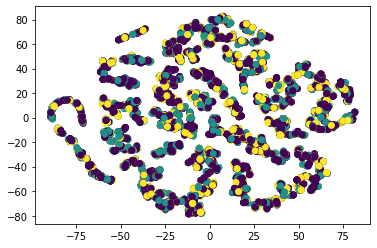

In [121]:
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]


plt.scatter(x_axis, y_axis, c=Y)
plt.show()

### метод DBSCAN¶

In [143]:
ds=df.reindex(columns=[
 'user-age',
 'user-income',
 'user-savings',
 'user-properties',                   
 'user-dependents',  
 'user-pension',                   
 'product-term',   
 'year',
 'month',
 'score',
    
 'user-gender',
 'user-nationality',
 'user-knowledge',
 'user-loyalty',
 'user-loan',
 'user-riskAversion',
 'user-marital',
 'product-yield',  
 'product-risk',
    
 
 
])

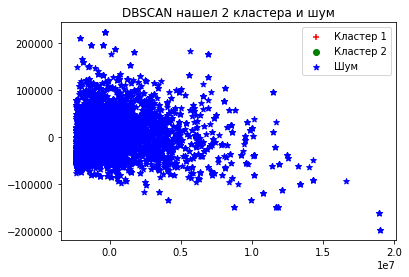

In [144]:
# Определяем модель

dbscan = DBSCAN()

# Обучаем
dbscan.fit(ds)

# Уменьшаем размерность при помощи метода главных компонент
pca = PCA(n_components=2).fit(ds)
pca_2d = pca.transform(ds)

# Строим в соответствии с тремя классами
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Кластер 1', 'Кластер 2', 'Шум'])
plt.title('DBSCAN нашел 2 кластера и шум')

plt.show()

### Иерархическая кластеризация¶

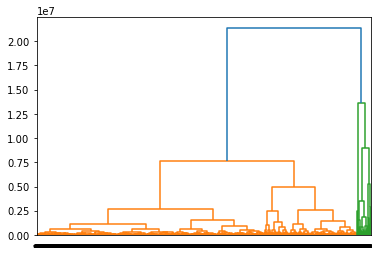

In [120]:
# Импортируем библиотеки
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd

# Исключаем информацию об образцах зерна, сохраняем для дальнейшего использования
varieties = list(df.pop('product-type'))

# Извлекаем измерения как массив NumPy
samples = df.values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='complete')

# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
           )

plt.show()